## Introduction to Quantitative Finance: Stylized Facts of Asset Returns  

https://towardsdatascience.com/introduction-to-quantitative-finance-part-i-stylised-facts-of-asset-returns-5190581e40ea

In [7]:
# import quandl
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# authentication ----
# quandl_key = 'key' # paste your own API key here :)
# quandl.ApiConfig.api_key = quandl_key
# df = quandl.get('WIKI/MSFT', start_date="2000-01-01", end_date="2017-12-31")

df = yf.download(tickers='MSFT', start='2000-01-01', end='2017-12-31')
df = df.loc[:, ['Adj Close']]
df.columns = ['adj_close']

[*********************100%***********************]  1 of 1 completed


In [3]:
# create simple and log returns, multiplied by 100 for convenience
df['simple_rtn'] = 100 * df.adj_close.pct_change()
df['log_rtn'] = 100 * (np.log(df.adj_close) - np.log(df.adj_close.shift(1)))

In [4]:
# dropping NA's in the first row
df.dropna(how='any', inplace=True)

In [5]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-04,35.684532,-3.378010,-3.436383
2000-01-05,36.060772,1.054350,1.048830
2000-01-06,34.852810,-3.349795,-3.407186
2000-01-07,35.308266,1.306798,1.298333
2000-01-10,35.565704,0.729117,0.726472


In [6]:
len(df)

4527

But why work with returns when we already have the prices?  
The reason is that prices are usually non-stationary, that is when statistics such as mean and variance (mathematical moments) change over time.

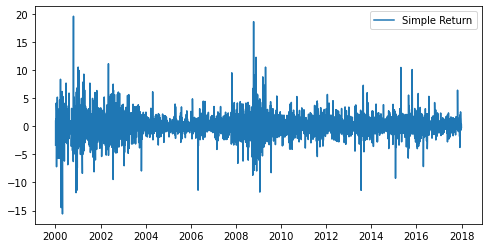

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df['simple_rtn'], label='Simple Return')
ax.legend();

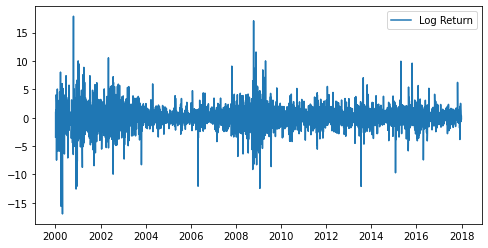

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df['log_rtn'], label='Log Return')
ax.legend();

One important fact that is directly observable at the plots is the existence of ‘volatility clustering’ — periods of large returns alternate with periods with small returns, suggesting that volatility is not constant